# Theoretical model of the effects of HPV vaccines on the collective reduction HPV based cancers.

Our main desire is to estimate a theoretical model that shows the effects of HPV vaccines on the "collective" reduction of HPV based cancers, using only aggregated data at population level (hence the word collective). Since, we are not considering individuals cases, we can at most estimate a "collective efficiency" $\alpha$. With it we can make a rought prediction of the future. 

Hence we assume the model has the following 
$$M_f(age, year) = C_f(age,year) - \alpha \frac{1}{2} \sum_{i=year_0}^{year} \left[V(age_i,i) + V(age_{i-1},i) \right]$$
where $age_i = age - (year - i)$

$C_f$: cancer incidence rate, where $f$ is the cancer type. Denotes the predicted number of new cancer cases for a person of x-age at y-year. Not taking into consideration HPV vaccine. Thus fitted to data prior to vaccination.

$V$: HPV vaccination. Denotes the predicted number of people that people take the vaccine

$\alpha$: Denotes the overall effect, HPV vaccines have on aggregated data.

Task: Here we fit a model to men's canser incidence rate

### Loading data

In [1]:
### Importing various packages
import preprocessor as pp
import pandas as pd
import numpy as np
import myplot as mpf
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import *
import scipy.io as sio

import warnings
#Comment this to turn on warnings
warnings.filterwarnings('ignore')

In [2]:
## Data files directory and names
filesname_men_age = [r'data_files/menn/kreft.menn.53-17..xlsx', r'data_files/menn/reseptregisteret_menn_norge.xls']
filesname_men_region = [r'data_files/menn/menn.kreft.fylker.71-17.xlsx', r'data_files/menn/reseptmennfylker.xls']

filesname_women_age = [r'data_files/kvinne/kvinner.kreft.53-17.xlsx', 
                       r'data_files/kvinne/reseptregisteret_women_norge.xls']
filesname_women_region = [r'data_files/kvinne/kvinner.kreft.fylker.71-17.xlsx', 
                          r'data_files/kvinne/reseptkvinnerfylker.xls']

## reading excel files 
men_data_age = []
women_data_age = []
for i in range(len(filesname_men_age)):
    men_data_age.append(pp.excel_lines(filesname_men_age[i]))  
for i in range(len(filesname_women_age)):
    women_data_age.append(pp.excel_lines(filesname_women_age[i]))
    
men_data_region = []
women_data_region = []
for i in range(len(filesname_men_region)):
    men_data_region.append(pp.excel_lines(filesname_men_region[i]))  
for i in range(len(filesname_women_region)):
    women_data_region.append(pp.excel_lines(filesname_women_region[i]))

In [3]:
### Processing HPV vaccine
## Men age
#--------------------------------------------------------------------------------
# producing x- and y-axis
C_y = [i for i in range(1953,2007)]             # corresponding years
C_x = [(4 + i*10) for i in range(8) ] +[90]+[(94 + i*10) for i in range(len(C_y)-9) ] # estimated corresponding ages

M_y = [i for i in range(2007,2018)]              # corresponding years
M_x = [(4 + i*10) for i in range(8) ] +[90]+[(94 + i*10) for i in range(len(M_y)-9) ] # estimated corresponding ages

y_axis = [i for i in range(1953,2018)]
x_axis = [(4 + i*10) for i in range(9) ]

## incidance rate cases
num_years = len(y_axis)
inci_A = pp.excel_extract(filesname_men_age[0], keyword = ['År','all'], num_parameter = num_years, 
                          case = 'Insidensrate', cancer_type = 'Anus')
inci_MO = pp.excel_extract(filesname_men_age[0], keyword = ['År','all'], num_parameter = num_years, 
                           case = 'Insidensrate', cancer_type = 'Munn, andre')

# All map
tempA = ( np.array(inci_A) ).astype(np.float64)
tempMO = ( np.array(inci_MO) ).astype(np.float64)

# fractions map
tempA_C = ( np.array(inci_A[0:len(C_y)]) ).astype(np.float64)
tempMO_C = ( np.array(inci_MO[0:len(C_y)]) ).astype(np.float64)

tempA_M = ( np.array(inci_A[len(C_y):]) ).astype(np.float64)
tempMO_M = ( np.array(inci_MO[len(C_y):]) ).astype(np.float64)

## data that will be used for fitting
# adding zeros to make it a square matrix 
C_A = (np.array( list(tempA_C.T)+list(np.zeros((45,54))) )).astype(np.float64)
C_MO = (np.array( list(tempMO_C.T)+list(np.zeros((45,54))) )).astype(np.float64)

M_A = (np.array( list(tempA_M.T)+list(np.zeros((2,11))) )).astype(np.float64)
M_MO = (np.array( list(tempA_M.T)+list(np.zeros((2,11))) )).astype(np.float64)



# adding zeros to make it a square matrix    
#V_Z_ageM = (np.array(list(np.zeros((4,19)))+pd_data2)).astype(np.float64)

#### All

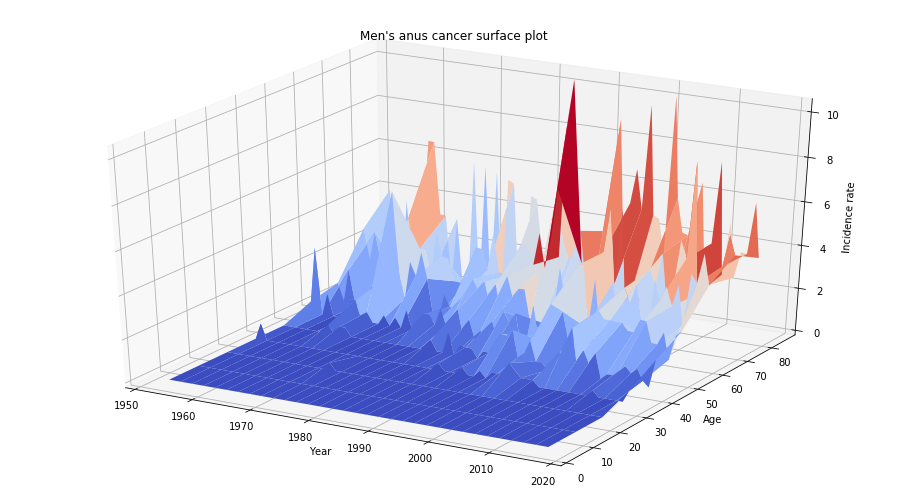

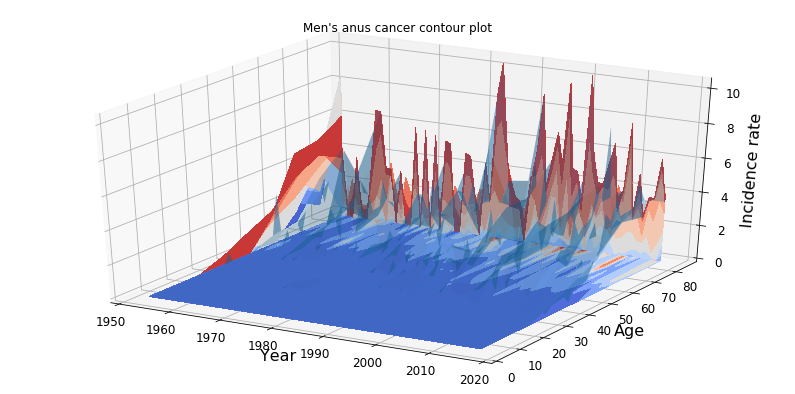

In [4]:
### Anus cancer
fig, ax = mpf.surface_plot(Z = tempA.T, Y=x_axis, X=y_axis, titl="Men's anus cancer surface plot", 
                           Xlabel='Year', Ylabel='Age', Zlabel="Incidence rate")
fig.savefig("plots/Model/Men's_anus_cancer_surface_plot.png")

fig, ax = mpf.contour3d_plot(Z = tempA.T, Y=x_axis, X=y_axis, titl="Men's anus cancer contour plot", 
                             Xlabel='Year', Ylabel='Age', Zlabel="Incidence rate")
fig.savefig("plots/Model/Men's_anus_cancer_contour_plot.png")

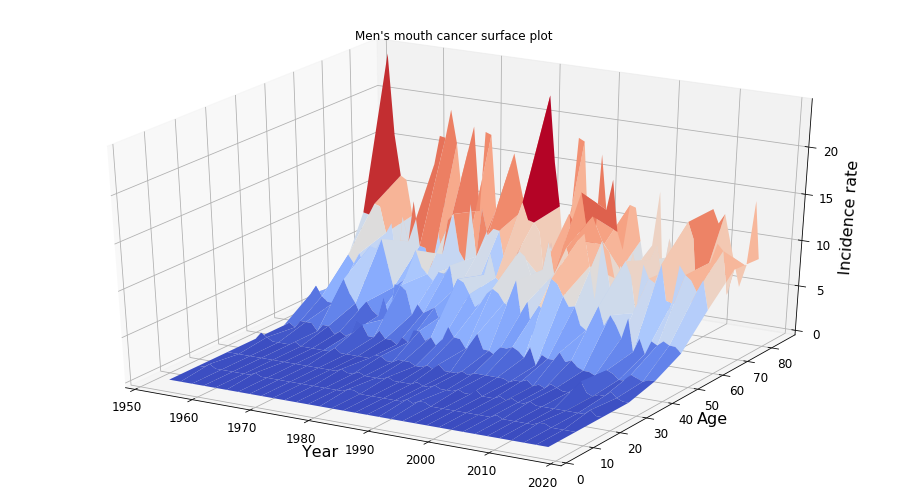

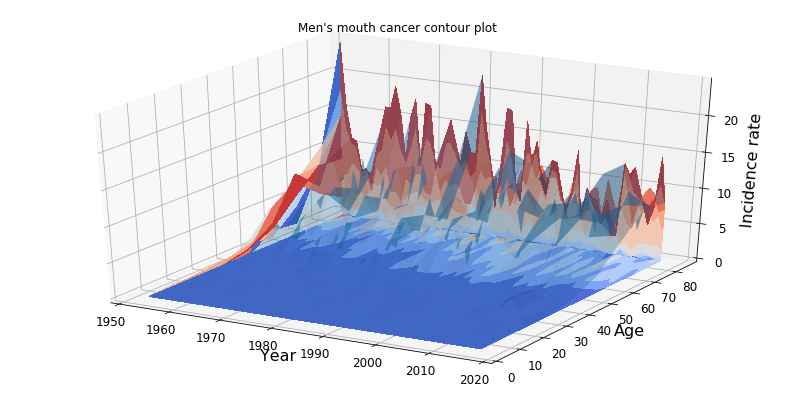

In [5]:
### Other cancer and other 
fig, ax = mpf.surface_plot(Z = tempMO.T, Y=x_axis, X=y_axis, titl="Men's mouth cancer surface plot", 
                           Xlabel='Year', Ylabel='Age', Zlabel="Incidence rate")
fig.savefig("plots/Model/Men's_mouth_cancer_surface_plot.png")

fig, ax = mpf.contour3d_plot(Z = tempMO.T, Y=x_axis, X=y_axis, titl="Men's mouth cancer contour plot", 
                             Xlabel='Year', Ylabel='Age', Zlabel="Incidence rate")
fig.savefig("plots/Model/Men's_mouth_cancer_contour_plot.png")

#### Data before vaccination

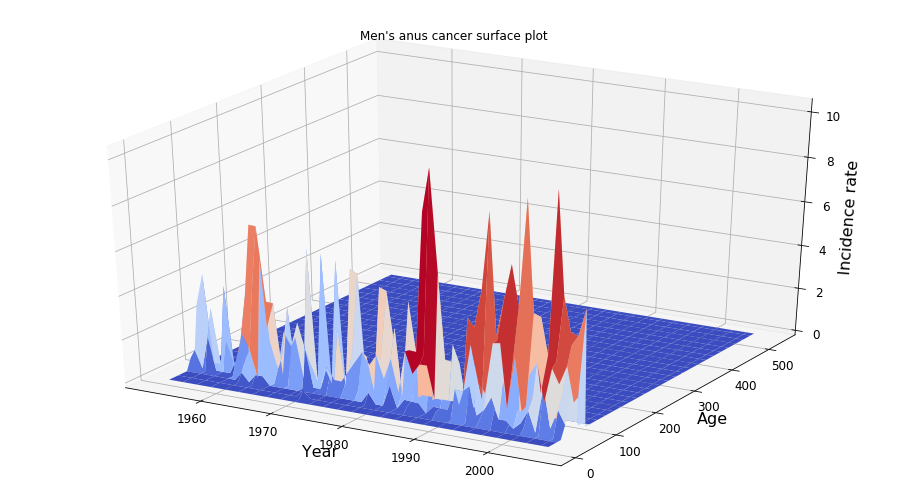

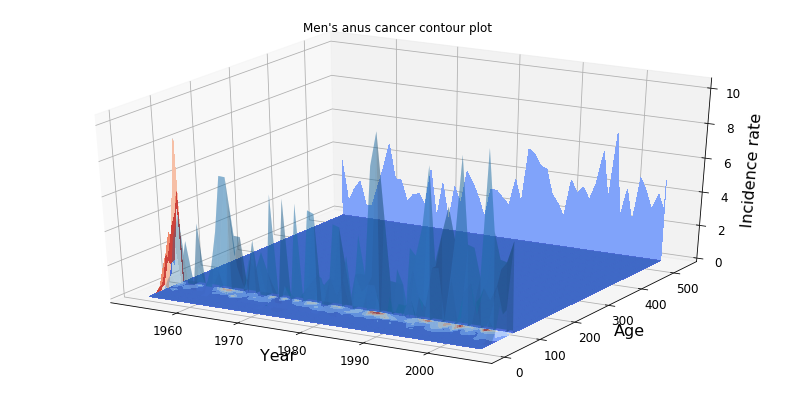

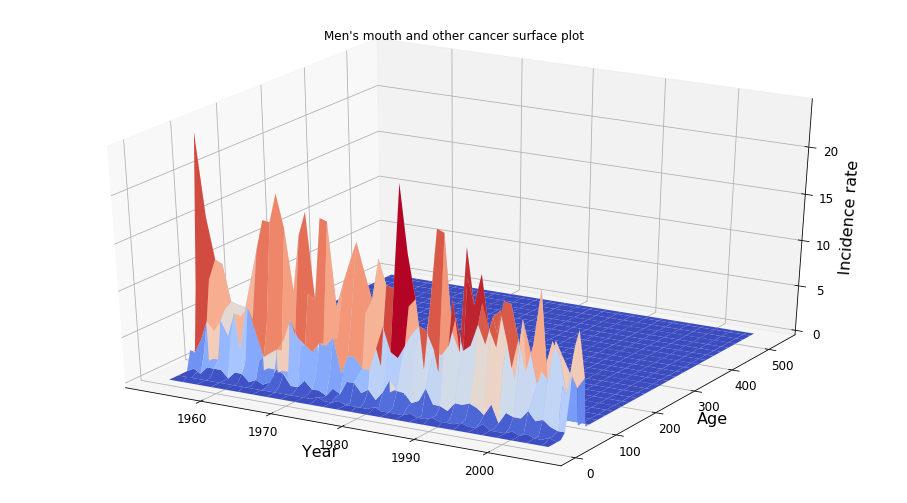

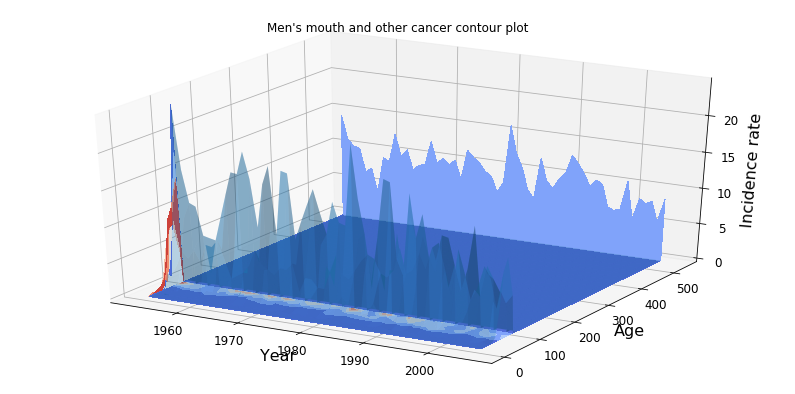

In [6]:
### Anus 
#-------------------------------------------------------------------------------------------------
fig, ax = mpf.surface_plot(Z = C_A, X=C_y, Y=C_x, titl="Men's anus cancer surface plot", 
                           Xlabel='Year', Ylabel='Age', Zlabel="Incidence rate")

fig, ax = mpf.contour3d_plot(Z = C_A, X=C_y, Y=C_x, titl="Men's anus cancer contour plot", 
                             Xlabel='Year', Ylabel='Age', Zlabel="Incidence rate")
#-------------------------------------------------------------------------------------------------

### Mouth and others 
#-------------------------------------------------------------------------------------------------
fig, ax = mpf.surface_plot(Z = C_MO, X=C_y, Y=C_x, titl="Men's mouth and other cancer surface plot", 
                           Xlabel='Year', Ylabel='Age', Zlabel="Incidence rate")

fig, ax = mpf.contour3d_plot(Z = C_MO, X=C_y, Y=C_x, titl="Men's mouth and other cancer contour plot", 
                             Xlabel='Year', Ylabel='Age', Zlabel="Incidence rate")
#-------------------------------------------------------------------------------------------------

#### Data during vaccination

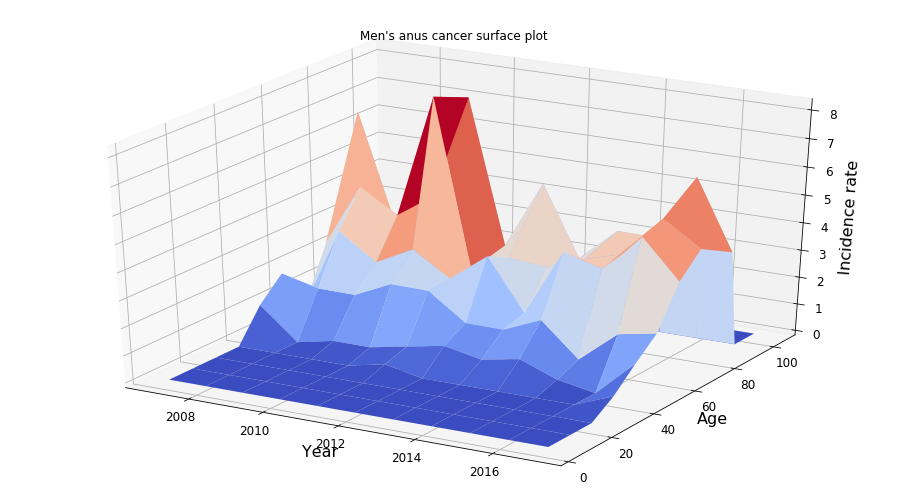

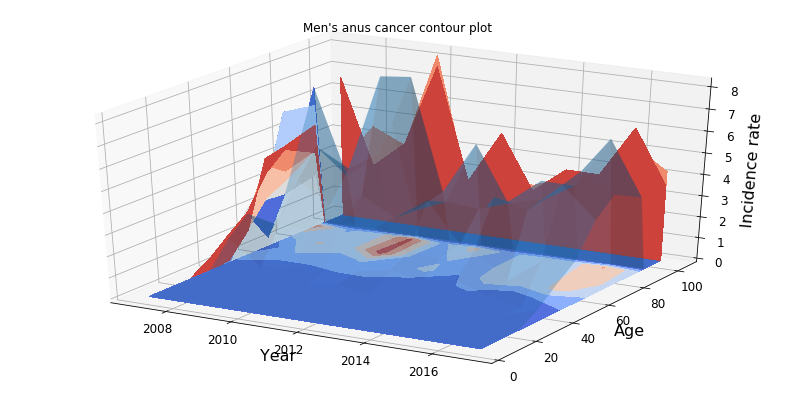

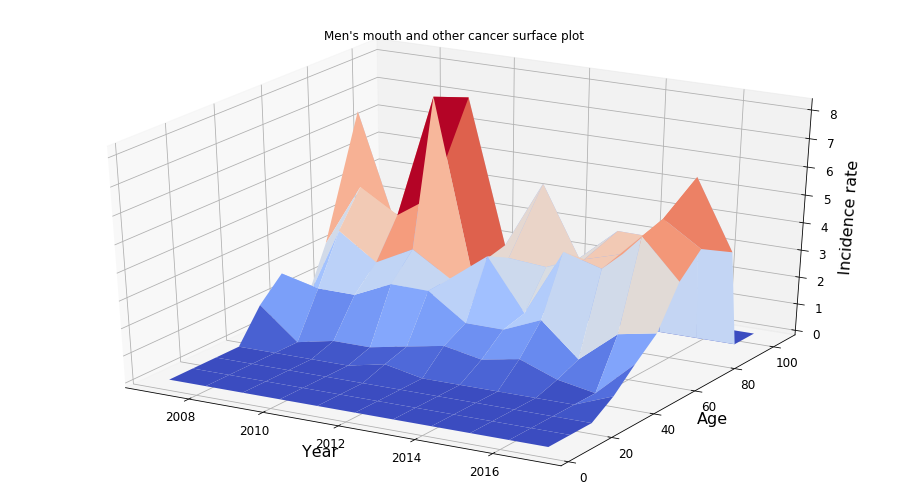

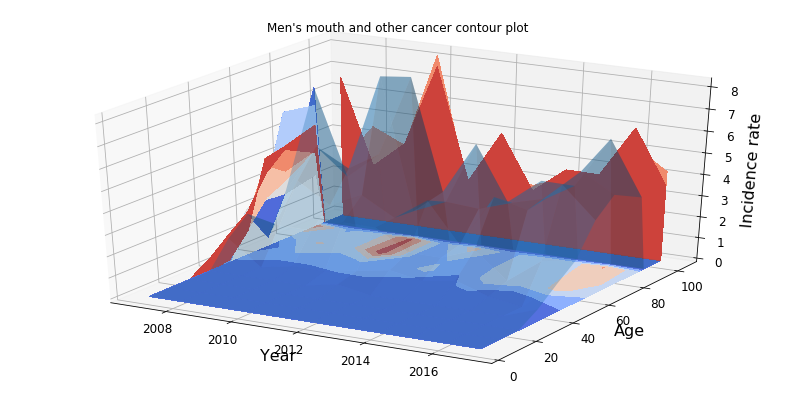

In [7]:
### Anus 
#-------------------------------------------------------------------------------------------------
fig, ax = mpf.surface_plot(Z = M_A, X=M_y, Y=M_x, titl="Men's anus cancer surface plot", 
                           Xlabel='Year', Ylabel='Age', Zlabel="Incidence rate")

fig, ax = mpf.contour3d_plot(Z = M_A, X=M_y, Y=M_x, titl="Men's anus cancer contour plot", 
                             Xlabel='Year', Ylabel='Age', Zlabel="Incidence rate")
#-------------------------------------------------------------------------------------------------

### Mouth and others 
#-------------------------------------------------------------------------------------------------
fig, ax = mpf.surface_plot(Z = M_MO, X=M_y, Y=M_x, titl="Men's mouth and other cancer surface plot", 
                           Xlabel='Year', Ylabel='Age', Zlabel="Incidence rate")

fig, ax = mpf.contour3d_plot(Z = M_MO, X=M_y, Y=M_x, titl="Men's mouth and other cancer contour plot", 
                             Xlabel='Year', Ylabel='Age', Zlabel="Incidence rate")
#-------------------------------------------------------------------------------------------------

### polynomial fitting model

$$ y = a_1 + a_2 x + a_3 y + a_4 xy \dots$$

In [8]:
# inporting defined functions for regression studie
import Regression_functions as rf
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

#### Anus fitting (before vaccine)

In [24]:
order= 30

# x and y axis
rows = C_y
cols = C_x
[x,y] = np.meshgrid(cols,rows)

design_matrix = rf.gen_def_matrix(x, y, k=order)
lasso = Lasso(0.5, max_iter=10000).fit(design_matrix, C_A.T.ravel())


## prediction
ynew = [i for i in range(2000,2080)]   # years
xnew = np.arange(0,80)                # ages
[x,y] = np.meshgrid(xnew,ynew)
Xnew = rf.gen_def_matrix(x, y, k=order)

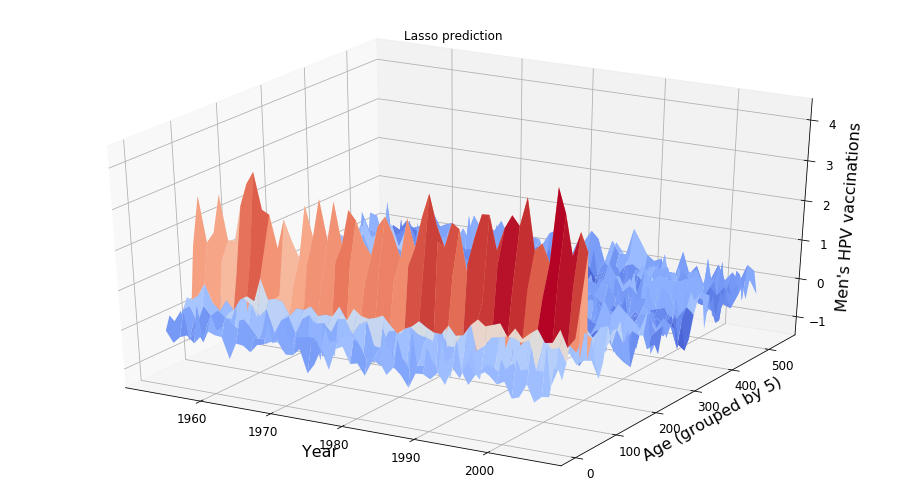

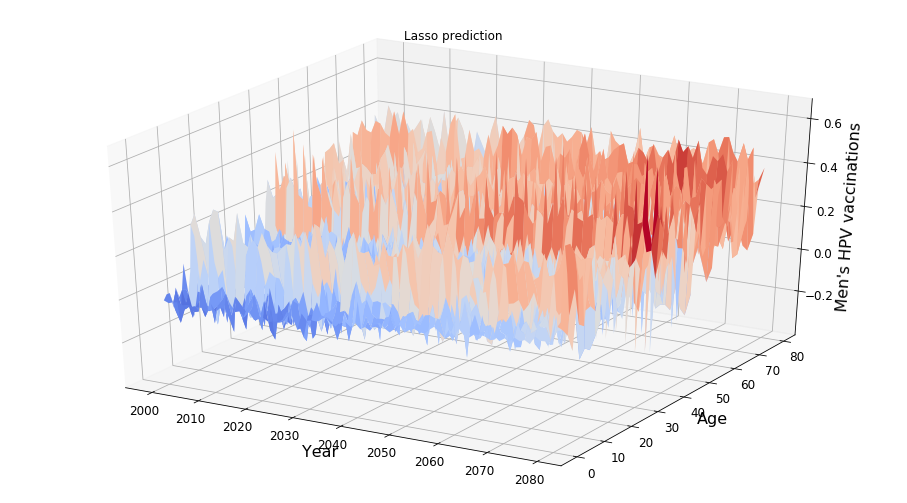

In [25]:
# same scaling
temp = lasso.predict(design_matrix)
ZpredicLasso = temp.reshape((len(cols), len(rows)))
    
fig, ax = mpf.surface_plot(Z = ZpredicLasso.T, X=C_y, Y=C_x, 
                           titl="Lasso prediction", Xlabel='Year', Ylabel='Age (grouped by 5)', 
                           Zlabel="Men's HPV vaccinations")

# different scaling
temp = lasso.predict(Xnew)
ZpredicLasso = temp.reshape((len(x), len(y)))/5
    
fig, ax = mpf.surface_plot(Z = ZpredicLasso.T, X=ynew, Y=xnew, 
                           titl="Lasso prediction", Xlabel='Year', Ylabel='Age', Zlabel="Men's HPV vaccinations")

Ordinary Least Squares method:
-------------------------------
The train MSE is: 0.2571 and the r^2-score is: 0.5895.
    The test MSE is: 0.4683 and the r^2-score is: 0.2441
--------------------------------------------------------------------------
Ridge regression method:
-------------------------
The train MSE is: 0.2402 and the r^2-score is: 0.6165.
    The test MSE is: 0.4499 and the r^2-score is: 0.2738
--------------------------------------------------------------------------
Lasso regression method:
-------------------------
The train MSE is: 0.2654 and the r^2-score is: 0.5762.
    The test MSE is: 0.4733 and the r^2-score is: 0.2359
--------------------------------------------------------------------------
Cross-validation OLS
--------------------
The train average MSE for fold 1 is: 0.25908; the train average R^2-score for fold 1 is: 0.57
The test average MSE for fold 1 is: 0.48120; the test average R^2-score for fold 1 is: 0.42
The train average MSE for fold 2 is: 0.27901; 

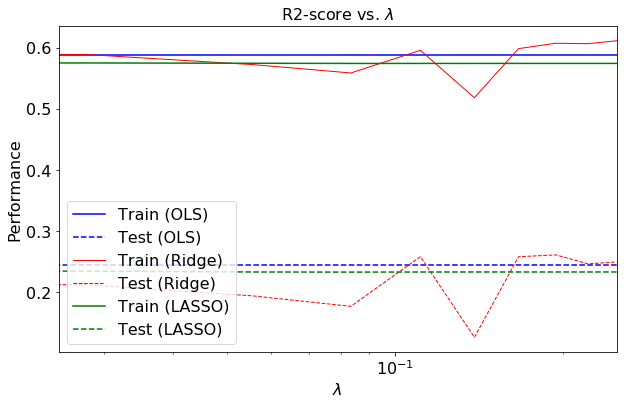

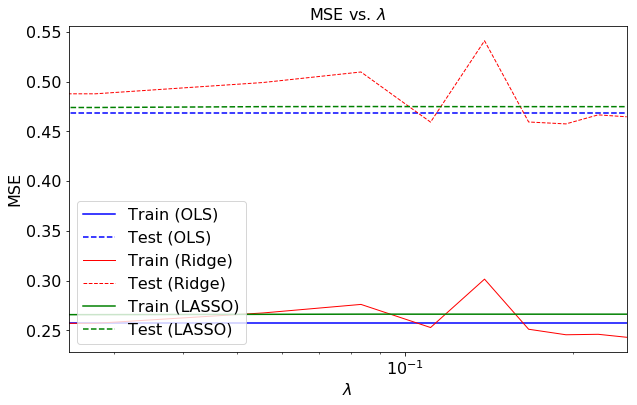

In [26]:
lambdas = np.linspace(0,0.25,10) # different lambda values


data = design_matrix
output = C_A.T.ravel()

rf.model_evaluation(data, output, lamb=0.0001, lams=lambdas , lasso_iteration=10000, kfolds= 10)

#### Mouth and other fitting (before vaccine)

In [27]:
order= 20

# x and y axis
rows = C_y
cols = C_x
[x,y] = np.meshgrid(cols,rows)

design_matrix = rf.gen_def_matrix(x, y, k=order)
lasso = Lasso(0.5, max_iter=10000).fit(design_matrix, C_MO.T.ravel())


## prediction
ynew = [i for i in range(2000,2080)]   # years
xnew = np.arange(0,80)                # ages
[x,y] = np.meshgrid(xnew,ynew)
Xnew = rf.gen_def_matrix(x, y, k=order)

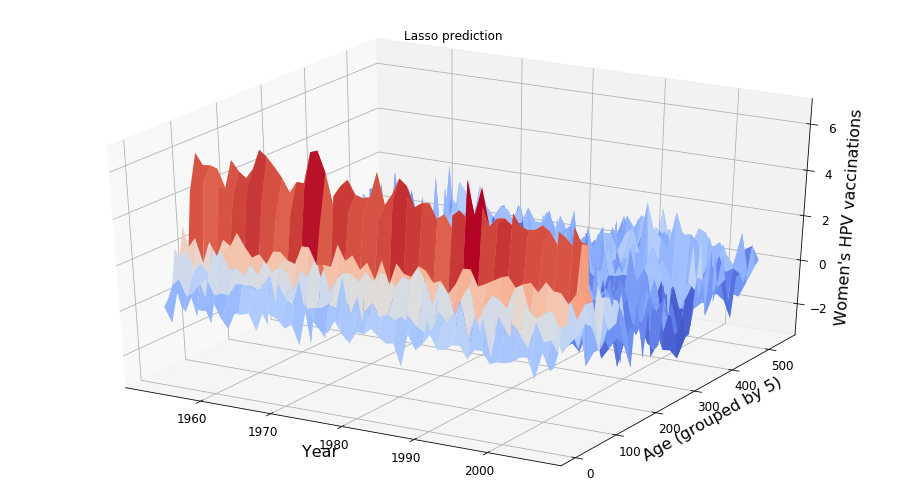

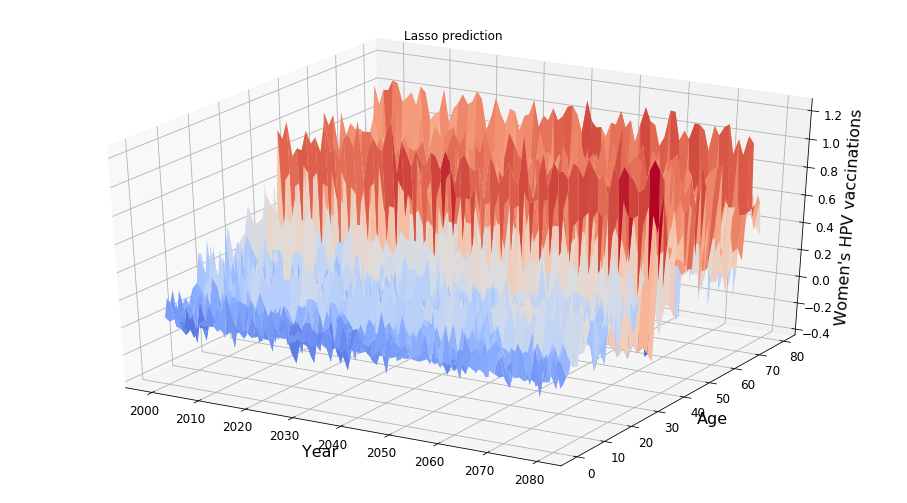

In [28]:
# same scaling
temp = lasso.predict(design_matrix)
ZpredicLasso = temp.reshape((len(cols), len(rows)))
    
fig, ax = mpf.surface_plot(Z = ZpredicLasso.T, X=C_y, Y=C_x, 
                           titl="Lasso prediction", Xlabel='Year', Ylabel='Age (grouped by 5)', 
                           Zlabel="Women's HPV vaccinations")

# different scaling
temp = lasso.predict(Xnew)
ZpredicLasso = temp.reshape((len(x), len(y)))/5
    
fig, ax = mpf.surface_plot(Z = ZpredicLasso.T, X=ynew, Y=xnew, 
                           titl="Lasso prediction", Xlabel='Year', Ylabel='Age', Zlabel="Women's HPV vaccinations")

Ordinary Least Squares method:
-------------------------------
The train MSE is: 2.2130 and the r^2-score is: 0.5204.
    The test MSE is: 3.7319 and the r^2-score is: 0.3690
--------------------------------------------------------------------------
Ridge regression method:
-------------------------
The train MSE is: 29.1081 and the r^2-score is: -5.3086.
    The test MSE is: 31.5570 and the r^2-score is: -4.3353
--------------------------------------------------------------------------
Lasso regression method:
-------------------------
The train MSE is: 2.4693 and the r^2-score is: 0.4648.
    The test MSE is: 4.0653 and the r^2-score is: 0.3127
--------------------------------------------------------------------------
Cross-validation OLS
--------------------
The train average MSE for fold 1 is: 2.57936; the train average R^2-score for fold 1 is: 0.49
The test average MSE for fold 1 is: 3.88593; the test average R^2-score for fold 1 is: 0.34
The train average MSE for fold 2 is: 2.647

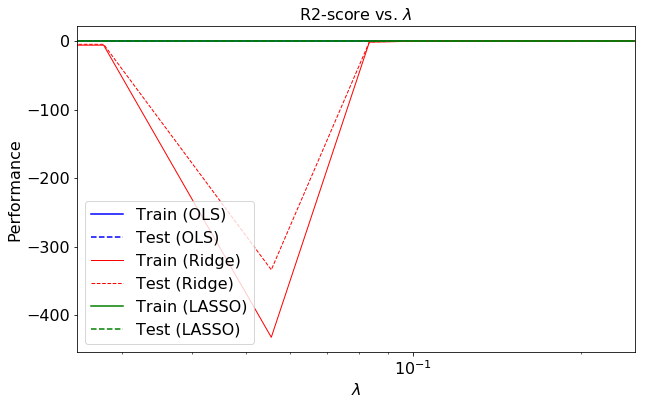

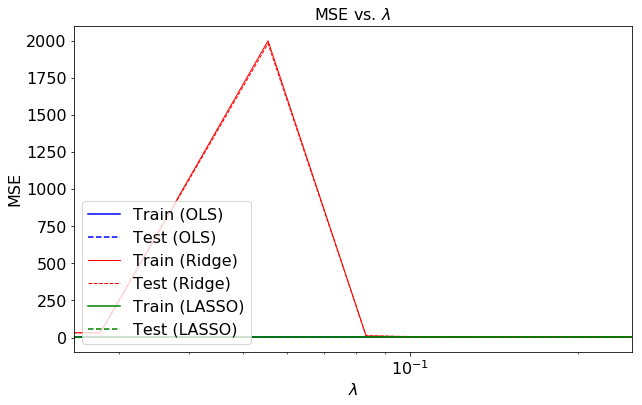

In [29]:
lambdas = np.linspace(0,0.25,10) # different lambda values


data = design_matrix
output = C_MO.T.ravel()

rf.model_evaluation(data, output, lamb=0.0001, lams=lambdas , lasso_iteration=10000, kfolds= 10)

### Exponential fitting model

$$y = e^{a_1 + a_2 x + a_3 y + a_4 xy \dots}$$

#### Anus fitting (before vaccine)

In [42]:
### Defining design matrix and prediction matrix
order = 14          # polynomial order
iterations = 10000 # number of iterations use 

# x and y axis
C = 0.0001 # constant used to tackle zeros
rows = C_y
cols = C_x
[x,y] = np.meshgrid(cols,rows)

design_matrix = rf.gen_def_matrix(x, y, k=order)

## predictions matrix
ynew = [i for i in range(2000,2080)]   # years
xnew = np.arange(0,80)                # ages
[x,y] = np.meshgrid(xnew,ynew)
Xnew = rf.gen_def_matrix(x, y, k=order)

In [43]:
## error minimization
#ols = LinearRegression(fit_intercept=True).fit(design_matrix, np.log10(C_A.T.ravel()+C))
#ridge = Ridge(alpha=0.5, max_iter=iterations).fit(design_matrix, np.log10(C_A.T.ravel()+C))
lasso = Lasso(alpha=0.5, max_iter=iterations).fit(design_matrix, np.log10(C_A.T.ravel()+C))

beta_b_anus = lasso.coef_

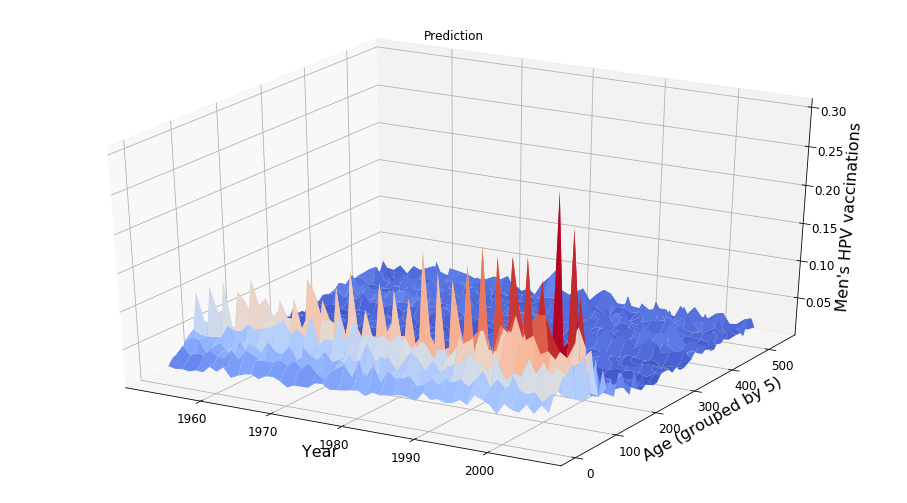

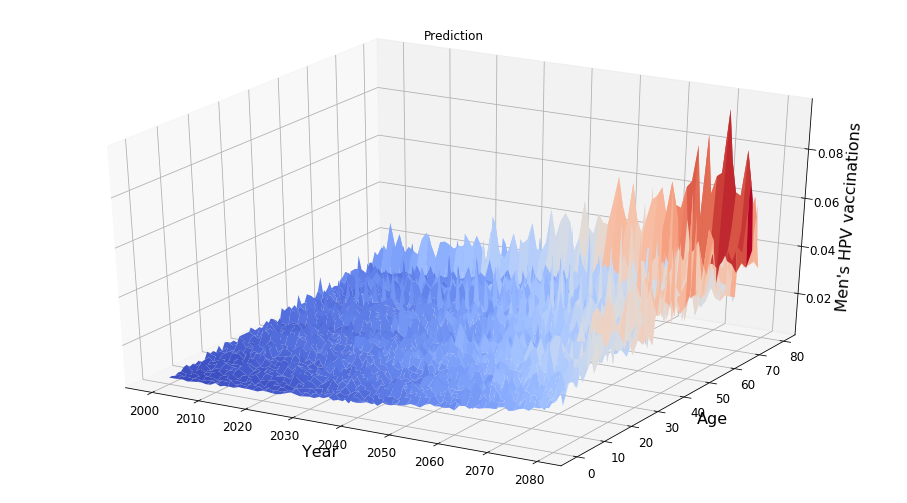

In [44]:
# same scaling
temp = np.exp(lasso.predict(design_matrix))-C
Zpredic = temp.reshape((len(cols), len(rows)))
    
fig, ax = mpf.surface_plot(Z = Zpredic.T, X=C_y, Y=C_x, 
                           titl="Prediction", Xlabel='Year', Ylabel='Age (grouped by 10)', Zlabel="Anus cancer incidence rate")

# different scaling
temp = np.exp(lasso.predict(Xnew))-C
Zpredic = temp.reshape((len(x), len(y)))/10
    
fig, ax = mpf.surface_plot(Z = Zpredic.T, X=ynew, Y=xnew, 
                           titl="Prediction", Xlabel='Year', Ylabel='Age', Zlabel="Anus cancer incidence rate")

Ordinary Least Squares method:
-------------------------------
The train MSE is: 0.5713 and the r^2-score is: 0.5272.
    The test MSE is: 0.6397 and the r^2-score is: 0.4842
--------------------------------------------------------------------------
Ridge regression method:
-------------------------
The train MSE is: 262.8819 and the r^2-score is: -216.5644.
    The test MSE is: 264.5921 and the r^2-score is: -212.3589
--------------------------------------------------------------------------
Lasso regression method:
-------------------------
The train MSE is: 0.7509 and the r^2-score is: 0.3785.
    The test MSE is: 0.8665 and the r^2-score is: 0.3013
--------------------------------------------------------------------------
Cross-validation OLS
--------------------
The train average MSE for fold 1 is: 0.58221; the train average R^2-score for fold 1 is: 0.53
The test average MSE for fold 1 is: 0.62185; the test average R^2-score for fold 1 is: 0.46
The train average MSE for fold 2 is:

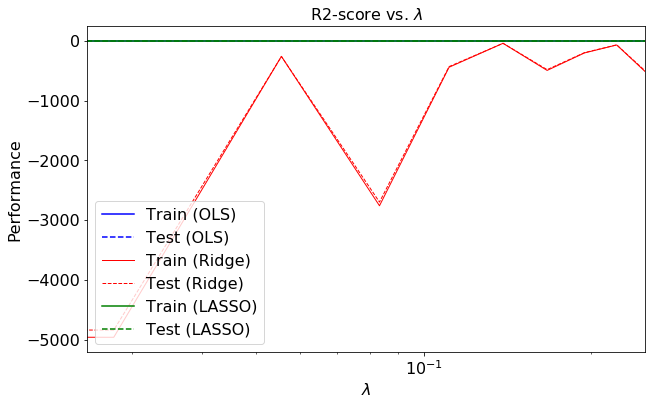

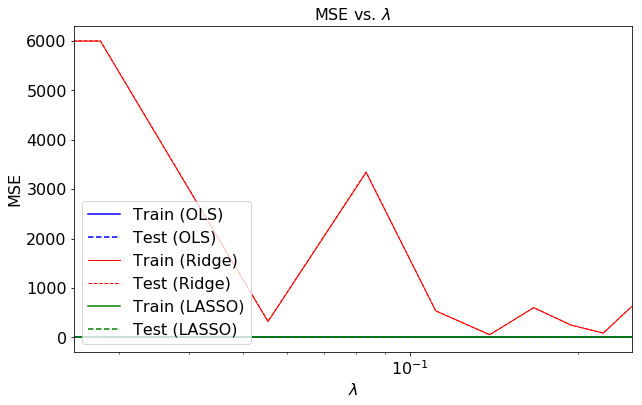

In [45]:
lambdas = np.linspace(0,0.25,10) # different lambda values

data = design_matrix
output = np.log10(C_A.T.ravel()+C)

rf.model_evaluation(data, output, lamb=0.0001, lams=lambdas , lasso_iteration=10000, kfolds= 10)

#### Mouth and other fitting (before vaccine)

In [19]:
### Defining design matrix and prediction matrix
order = 9          # polynomial order
iterations = 10000 # number of iterations use 

# x and y axis
C = 0.0001 # constant used to tackle zeros
rows = C_y
cols = C_x
[x,y] = np.meshgrid(cols,rows)

design_matrix = rf.gen_def_matrix(x, y, k=order)

## predictions matrix
ynew = [i for i in range(2000,2080)]   # years
xnew = np.arange(0,80)                # ages
[x,y] = np.meshgrid(xnew,ynew)
Xnew = rf.gen_def_matrix(x, y, k=order)

In [20]:
## error minimization method

#ols = LinearRegression(fit_intercept=True).fit(design_matrix, np.log10(C_MO.T.ravel()+C))
#ridge = Ridge(alpha=0.5, max_iter=iterations).fit(design_matrix, np.log10(C_MO.T.ravel()+C))
lasso = Lasso(alpha=0.5, max_iter=iterations).fit(design_matrix, np.log10(C_MO.T.ravel()+C))

beta_b_MO = lasso.coef_

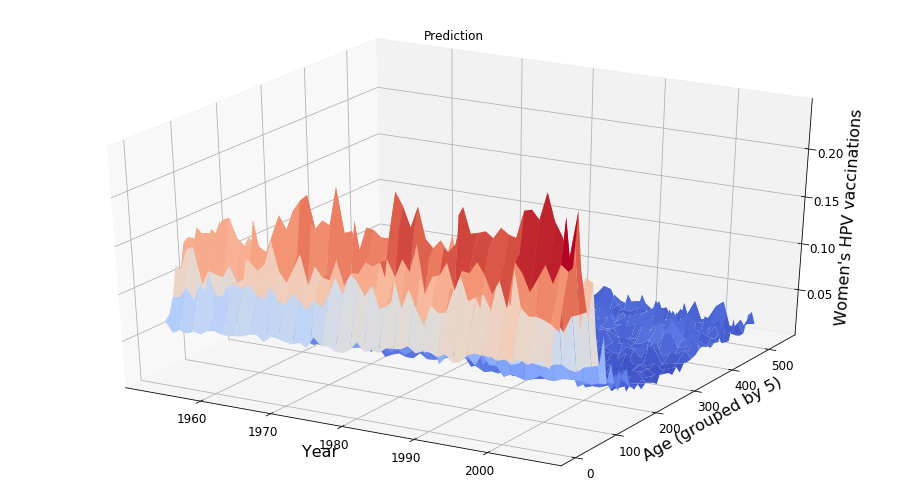

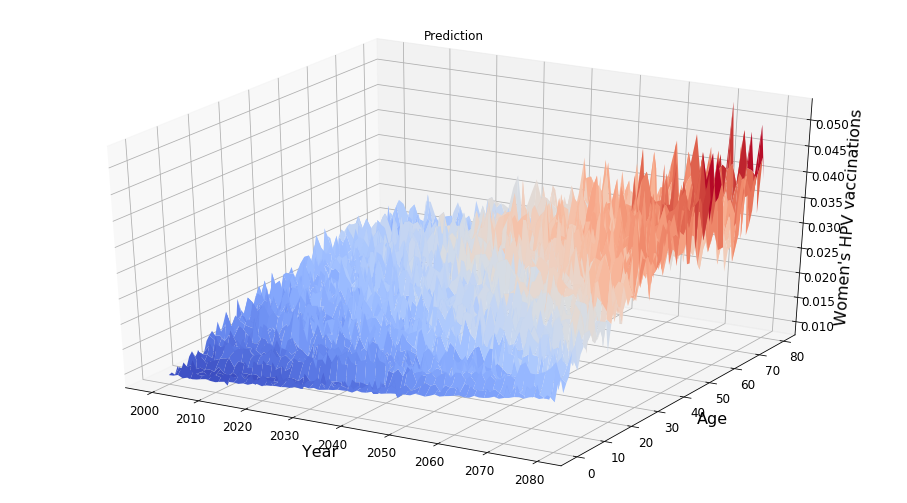

In [21]:
# same scaling
temp = np.exp(lasso.predict(design_matrix))-C
Zpredic = temp.reshape((len(cols), len(rows)))
    
fig, ax = mpf.surface_plot(Z = Zpredic.T, X=C_y, Y=C_x, 
                           titl="Prediction", Xlabel='Year', Ylabel='Age (grouped by 10)', 
                           Zlabel="Mouth and other cancer incidence rate")

# different scaling
temp = np.exp(lasso.predict(Xnew))-C
Zpredic = temp.reshape((len(x), len(y)))/10
    
fig, ax = mpf.surface_plot(Z = Zpredic.T, X=ynew, Y=xnew, 
                           titl="Prediction", Xlabel='Year', Ylabel='Age', 
                           Zlabel="Mouth and other cancer incidence rate")

Ordinary Least Squares method:
-------------------------------
The train MSE is: 0.6936 and the r^2-score is: 0.6355.
    The test MSE is: 0.7659 and the r^2-score is: 0.6112
--------------------------------------------------------------------------
Ridge regression method:
-------------------------
The train MSE is: 4.0892 and the r^2-score is: -1.1487.
    The test MSE is: 4.1928 and the r^2-score is: -1.1283
--------------------------------------------------------------------------
Lasso regression method:
-------------------------
The train MSE is: 1.1039 and the r^2-score is: 0.4200.
    The test MSE is: 1.1959 and the r^2-score is: 0.3930
--------------------------------------------------------------------------
Cross-validation OLS
--------------------
The train average MSE for fold 1 is: 0.72165; the train average R^2-score for fold 1 is: 0.63
The test average MSE for fold 1 is: 0.67771; the test average R^2-score for fold 1 is: 0.66
The train average MSE for fold 2 is: 0.71682

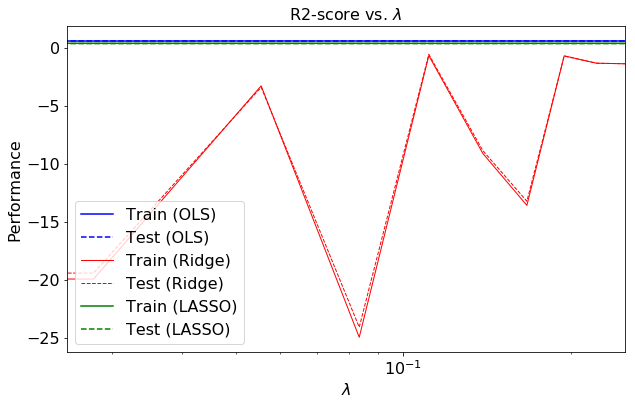

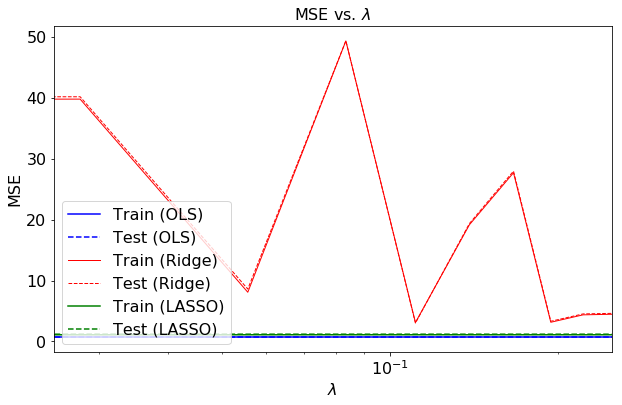

In [22]:
lambdas = np.linspace(0,0.25,10) # different lambda values

data = design_matrix
output = np.log10(C_MO.T.ravel()+C)

rf.model_evaluation(data, output, lamb=0.0001, lams=lambdas , lasso_iteration=10000, kfolds= 10)

#### Anus fitting (during vaccine)

In [ ]:
### Defining design matrix and prediction matrix
order = 14          # polynomial order
iterations = 10000 # number of iterations use 

# x and y axis
C = 0.0001 # constant used to tackle zeros
rows = M_y
cols = M_x
[x,y] = np.meshgrid(cols,rows)

design_matrix = rf.gen_def_matrix(x, y, k=order)

## predictions matrix
ynew = [i for i in range(2000,2080)]   # years
xnew = np.arange(0,80)                # ages
[x,y] = np.meshgrid(xnew,ynew)
Xnew = rf.gen_def_matrix(x, y, k=order)

In [ ]:
## error minimization
#ols = LinearRegression(fit_intercept=True).fit(design_matrix, np.log10(C_A.T.ravel()+C))
#ridge = Ridge(alpha=0.5, max_iter=iterations).fit(design_matrix, np.log10(C_A.T.ravel()+C))
lasso = Lasso(alpha=0.5, max_iter=iterations).fit(design_matrix, np.log10(M_A.T.ravel()+C))

beta_d_anus = lasso.coef_

### Saving beta parameters

In [23]:
file_save = 'beta_parameters/Mcancer_parameters.mat' # saving at/saving as

sio.savemat(file_save,{'beta_before_Anus':beta_b_A,'beta_before_Mouth':beta_b_MO,'beta_during_Anus':beta_d_A,
                       'beta_during_Mouth':beta_d_MO})

NameError: name 'beta_b_A' is not defined